## Carga de librerías

In [17]:
# importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

## Carga del archivo CSV

In [128]:
# Cargar el archivo CSV
df = pd.read_csv("tratamiento_de_valores_faltantes.csv")

## Exploración de los datos

In [27]:
# Visualizar el dataframe
df.head()

,x1,x2,x3,x4
0,1.307150,Comida rápida,5.249548,2.790293
1,18.422083,Mexicano,5.278007,3.330853
2,7.729605,Italiano,7.403145,2.895753
3,10.599776,Comida rápida,7.209577,3.393178
4,5.612505,Chino,5.896599,2.901199


In [ ]:
# Se sustituye el nombre de la columna x2 por "Tipo Restaurante"

In [19]:
# Identificar las variables categóricas y numéricas
cat_vars = df.select_dtypes(include=['object']).columns
num_vars = df.select_dtypes(include=['int64', 'float64']).columns

In [20]:
# Imprimir las variables categóricas y numéricas
print("Variables categóricas: ", cat_vars)
print("Variables numéricas: ", num_vars)

Variables categóricas:  Index(['x2'], dtype='object')
Variables numéricas:  Index(['x1', 'x3', 'x4'], dtype='object')


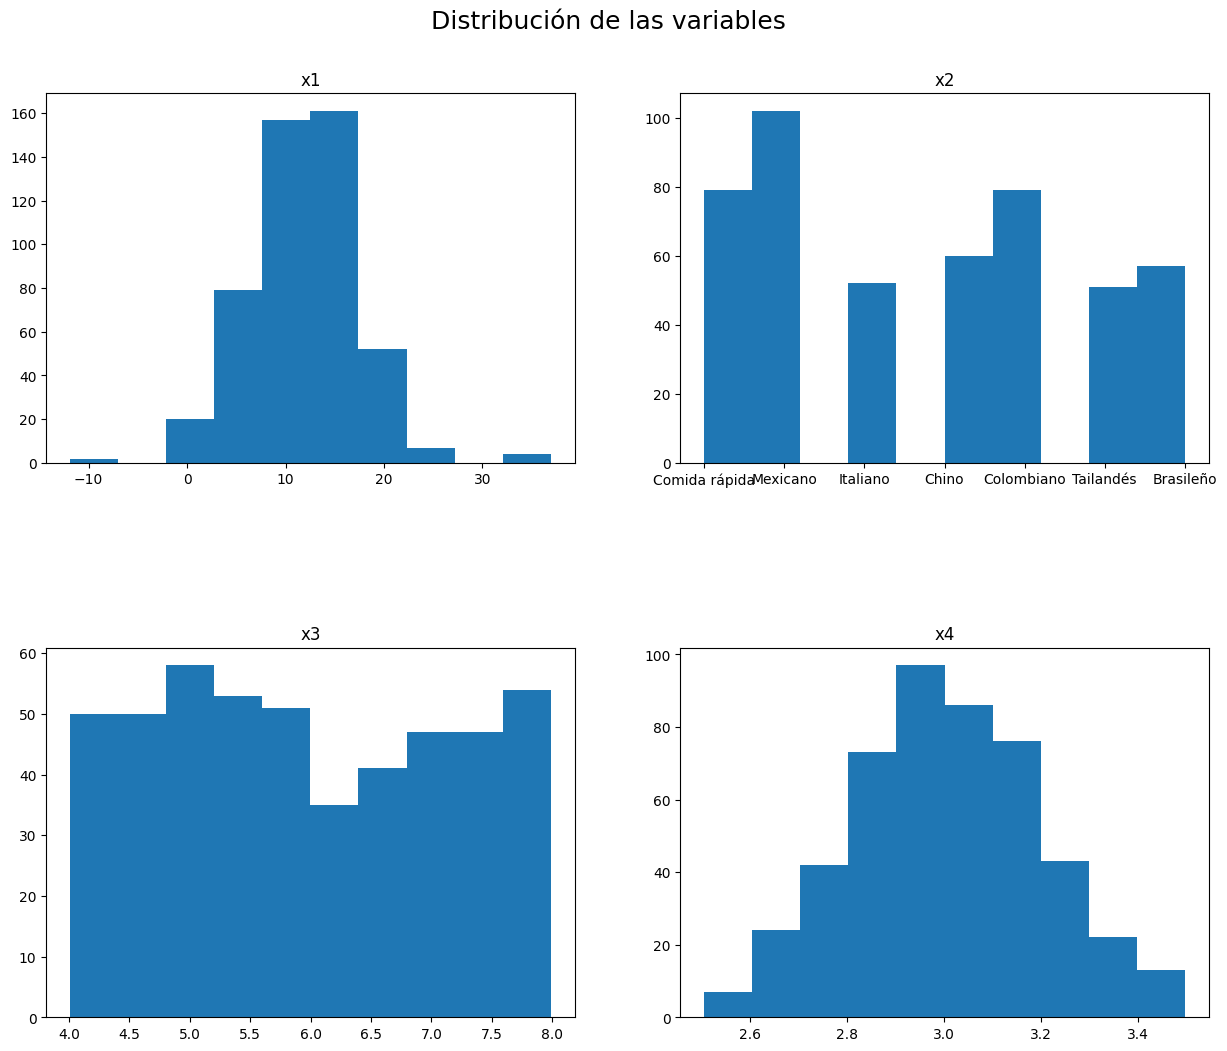

In [43]:
# Imprimir la distribución de las variables
# Se define el grid de la subplot
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Distribución de las variables", fontsize=18, y=0.95)

for col_name, ax in zip(df.columns, axs.ravel()):
    ax.hist(df[col_name].dropna(), bins=10)
    ax.set_title(col_name)
plt.show()

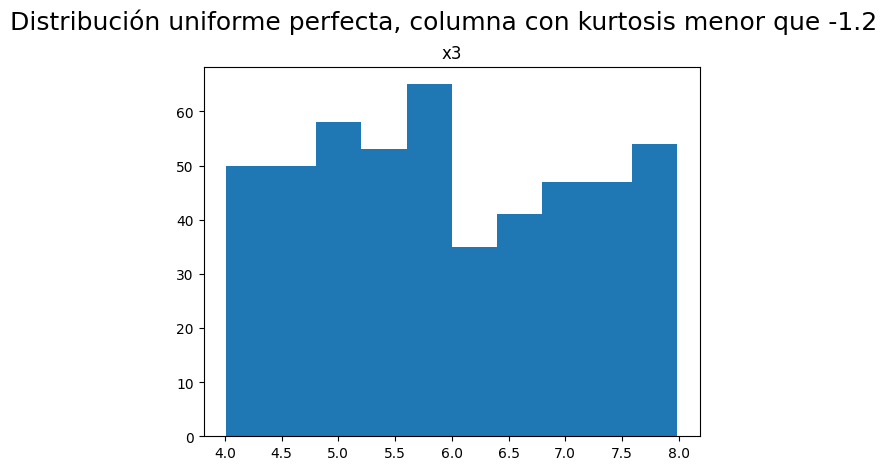

In [109]:
# Mismo gráfico tomando en cuenta la Kurtosis (Distribución semejante a la uniforme cuya curtosis sea menor a -1.2)
# Imprimir la distribución de las variables
# Se define el grid de la subplot
for col_name in num_vars:
    col_kurtosis = df[col_name].kurtosis()
    # Se aplica a valores con distribución uniforme (kurtosis < -1.2) para evitar sesgar la distribución de las variables
    # Distribución uniforme perfecta
    if col_kurtosis < -1.2:
        fig, ax = plt.subplots()
        fig.suptitle("Distribución uniforme perfecta, columna con kurtosis menor que -1.2", fontsize=18, y=1)
        ax.hist(df[col_name].dropna(), bins=10)
        ax.set_title(col_name)
        plt.show()

In [61]:
# Podemos evaluar moda individualmente para efectos ilustrativos
# Como es posible observar, las columnas numéricas parecen no tener valores repetitivos
df_mode = df.mode(axis=0, numeric_only=False, dropna=True)
df_mode

,x1,x2,x3,x4
0,-11.866135,Mexicano,4.010899,2.506359
1,-11.328720,NaN,4.014312,2.527400
2,-1.936713,NaN,4.015999,2.547136
3,-0.949094,NaN,4.018869,2.547737
4,-0.776972,NaN,4.026486,2.565325
...,...,...,...,...
481,36.922954,NaN,7.953492,3.482389
482,NaN,NaN,7.961679,3.496185
483,NaN,NaN,7.967528,NaN
484,NaN,NaN,7.973909,NaN


### Entonces ...
Para las variables categóricas, la moda es una buena elección porque es el valor más común y es una medida de tendencia central. Sin embargo, como es posible observar las columnas numéricas parecen no tener valores repetitivos, es por ello que se elige la media porque es una medida de tendencia central que es afectada por los valores atípicos y si representará un ajuste que permite continuar con el análisis del modelo con normalidad.

In [127]:
# Podemos evaluar mediana individualmente para efectos ilustrativos
df.median(axis=0, numeric_only=True)

x1    11.997242
x3     5.887484
x4     3.000913
dtype: float64

Para reforzar el argumento, cabe mostrar el número de repeticiones del dato más repetido o el top de la tabla anterior, que no alcanza a poder representar el dato más repetido o el rango que en el que la tendencia es central:

In [63]:
# Pandas ordena la moda de mayor número de repeticiones a menor, vamos a comprobar si las columnas numéricas repiten datos
for col_name in df_mode.columns:
    top_mode_val = df_mode[col_name][0]
    repeticiones = df[col_name].value_counts()[top_mode_val]
    print(f"Columna: {col_name} Top Moda: {top_mode_val}. Repeticiones: {repeticiones}")
# Como es posible observar, no es óptimo usar la moda para los valores numéricos

Columna: x1 Top Moda: -11.86613523835208. Repeticiones: 1
Columna: x2 Top Moda: Mexicano. Repeticiones: 102
Columna: x3 Top Moda: 4.010898562741264. Repeticiones: 1
Columna: x4 Top Moda: 2.506359395005968. Repeticiones: 1


## Manejo de valores faltantes

In [69]:
# Revisar valores faltantes
dfNaN=df.isna()
dfNaN.sum()

x1    18
x2    20
x3    14
x4    17
dtype: int64

Como ya se argumentó, se sustituirán los valores faltantes por el valor más común o moda en el caso de las variables categóricas y por la mediana en el caso de las variables numéricas.

In [129]:
# Identificar y manejar los valores faltantes
for column_name in df.columns:
    column_has_na_vals = dfNaN[column_name].sum() > 0
    if column_has_na_vals:
        if column_name in cat_vars:
            # Para las variables categóricas, se sustituirá el valor faltante por el valor más común.
            top_mode = df[column_name].mode()[0]
            print(column_name, " - Sustituir valores faltantes con la moda: ", top_mode)
            df[column_name].fillna(top_mode, inplace=True)
        elif column_name in num_vars:
            # Para las variables numéricas, se sustituirá el valor faltante por la mediana.
            median = df[column_name].median()
            print(column_name, " - Sustituir valores faltantes con la mediana: ", median)
            df[column_name].fillna(median, inplace=True)


x1  - Sustituir valores faltantes con la mediana:  11.997241740674525
x2  - Sustituir valores faltantes con la moda:  Mexicano
x3  - Sustituir valores faltantes con la mediana:  5.887483636620848
x4  - Sustituir valores faltantes con la mediana:  3.0009128252890105


## Identificación de valores atípicos.

Citando a wikipedia:
The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.

You must be wondering that, how does this help in identifying the outliers? Well, while calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

De esto podemos concluir que obteniendo el puntaje z_score y evaluando los valores mayores a 3 (usando valor absoluto), podemos obtener outliers

In [89]:
# Identificar los datos atípicos
for col_name in num_vars:
    z_scores = zscore(df[col_name])
    threshold_z_score = 3
    outliers = np.abs(z_scores) > threshold_z_score
    # En el caso que la columna evaluada tenga algún oulier as true, imprimir atipicos
    if outliers.any():
        print(f"Datos atípicos en {col_name}:")
        print(df[col_name][outliers])

Datos atípicos en x1:
128    36.036833
254   -11.866135
260    36.922954
368    35.025965
377   -11.328720
407    35.909201
Name: x1, dtype: float64


<AxesSubplot: xlabel='x1'>

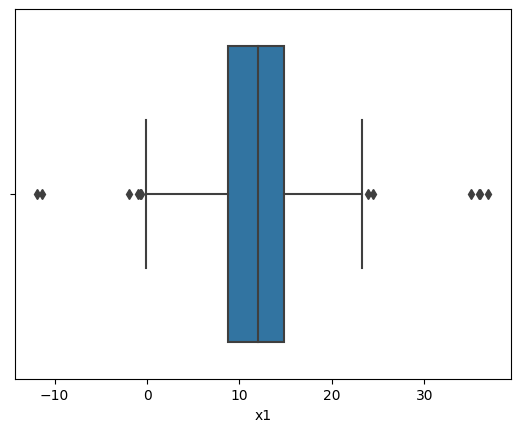

In [88]:
# Como ejemplo más tangible, podemos visualizar un boxplot
import seaborn as sns
sns.boxplot(x=df['x1'])

Se decide eliminar los valores atípicos porque es probable que si se realiza un estudio con estos datos, los valores atipicos sesgen los resultados al no ser tan comunes.


In [131]:
# Recordemos que la columna con valores atipicos era x1
z_scores = zscore(df['x1'])
threshold_z_score = 3
not_outliers = np.abs(z_scores) < threshold_z_score
df_clean = df[not_outliers]
print(f"Dimensiones dataframe original: {df.shape}")
print(f"Dimensiones dataframe sin outliers: {df_clean.shape}")

Dimensiones dataframe original: (500, 4)
Dimensiones dataframe sin outliers: (494, 4)


In [132]:
df_clean

,x1,x2,x3,x4
0,1.307150,Comida rápida,5.249548,2.790293
1,18.422083,Mexicano,5.278007,3.330853
2,7.729605,Italiano,7.403145,2.895753
3,10.599776,Comida rápida,7.209577,3.393178
4,5.612505,Chino,5.896599,2.901199
...,...,...,...,...
495,7.851055,Tailandés,4.159333,3.100521
496,12.174165,Comida rápida,6.004050,2.917600
497,10.984803,Italiano,6.017403,2.979846
498,7.420852,Chino,7.327392,2.819767


En este punto, el dataset ya no contiene observaciones con valores átipicos o datos nulos. Se alcanzan a ver calores cercanos a los bigotes, pero ya están muy cercanos y no representan un problema.

<AxesSubplot: xlabel='x1'>

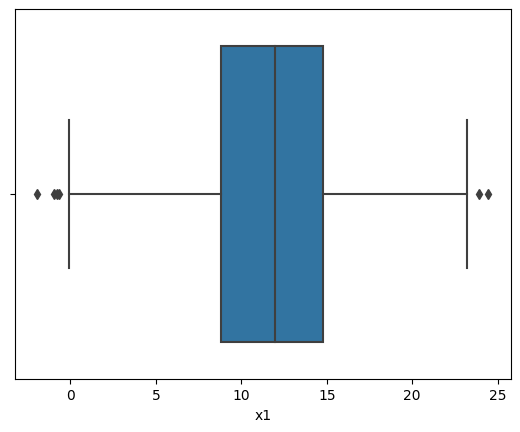

In [138]:
# Revisar si existen outliers
import seaborn as sns
sns.boxplot(x=df_clean['x1'])

In [140]:
# Revisar valores faltantes
dfNaN=df_clean.isna()
dfNaN.sum()

x1    0
x2    0
x3    0
x4    0
dtype: int64

## Fuentes
https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
